<a href="https://colab.research.google.com/github/AdemHamroun/ML-project/blob/main/motor_temperature_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
df=pd.read_csv("measures_v2.csv")
df



,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17.0
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17.0
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17.0
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17.0
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299058,85.467018,18.917614,79.463905,-98.923607,64.901794,4999.938477,-136.476730,53.800617,85.591568,45.986176,26.391294,48.497330,6.0
299059,85.397263,18.920589,79.417046,-99.049637,64.895584,4999.940430,-136.473587,53.803211,85.582016,45.986176,26.389372,48.505917,6.0
299060,85.322937,18.983587,79.412781,-99.086227,64.883606,4999.932617,-136.421631,53.820881,85.568214,45.986176,26.387993,48.463928,6.0
299061,85.186356,19.052309,79.444092,-99.060768,64.884041,4999.943359,-136.334152,53.802311,85.556305,45.986176,26.387005,48.457851,6.0


In [17]:
df1=df.dropna()
df1

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17.0
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17.0
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17.0
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17.0
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299057,85.451035,18.939550,79.524269,-98.954033,64.900993,4999.941895,-136.525208,53.838623,85.604065,45.986176,26.393980,48.550056,6.0
299058,85.467018,18.917614,79.463905,-98.923607,64.901794,4999.938477,-136.476730,53.800617,85.591568,45.986176,26.391294,48.497330,6.0
299059,85.397263,18.920589,79.417046,-99.049637,64.895584,4999.940430,-136.473587,53.803211,85.582016,45.986176,26.389372,48.505917,6.0
299060,85.322937,18.983587,79.412781,-99.086227,64.883606,4999.932617,-136.421631,53.820881,85.568214,45.986176,26.387993,48.463928,6.0


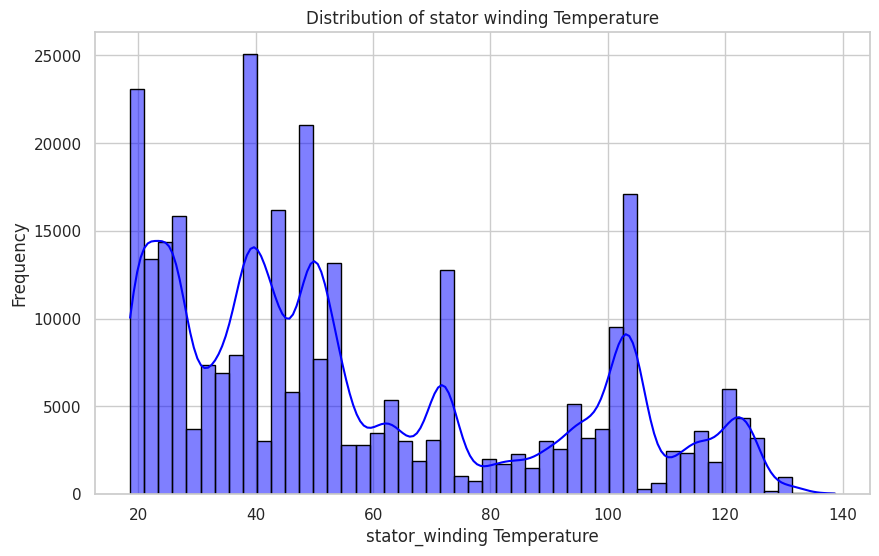

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df1['stator_winding'], bins=50, kde=True, color='blue', edgecolor='black')
plt.xlabel('stator_winding Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of stator winding Temperature')

plt.show()


Correlations with stator_winding :
 stator_winding    1.000000
stator_tooth      0.989910
stator_yoke       0.954597
pm                0.828903
motor_speed       0.566993
torque            0.519827
i_q               0.435139
profile_id        0.394325
coolant           0.287858
ambient           0.029129
u_q              -0.200678
u_d              -0.774308
i_d              -0.903159
Name: stator_winding, dtype: float64


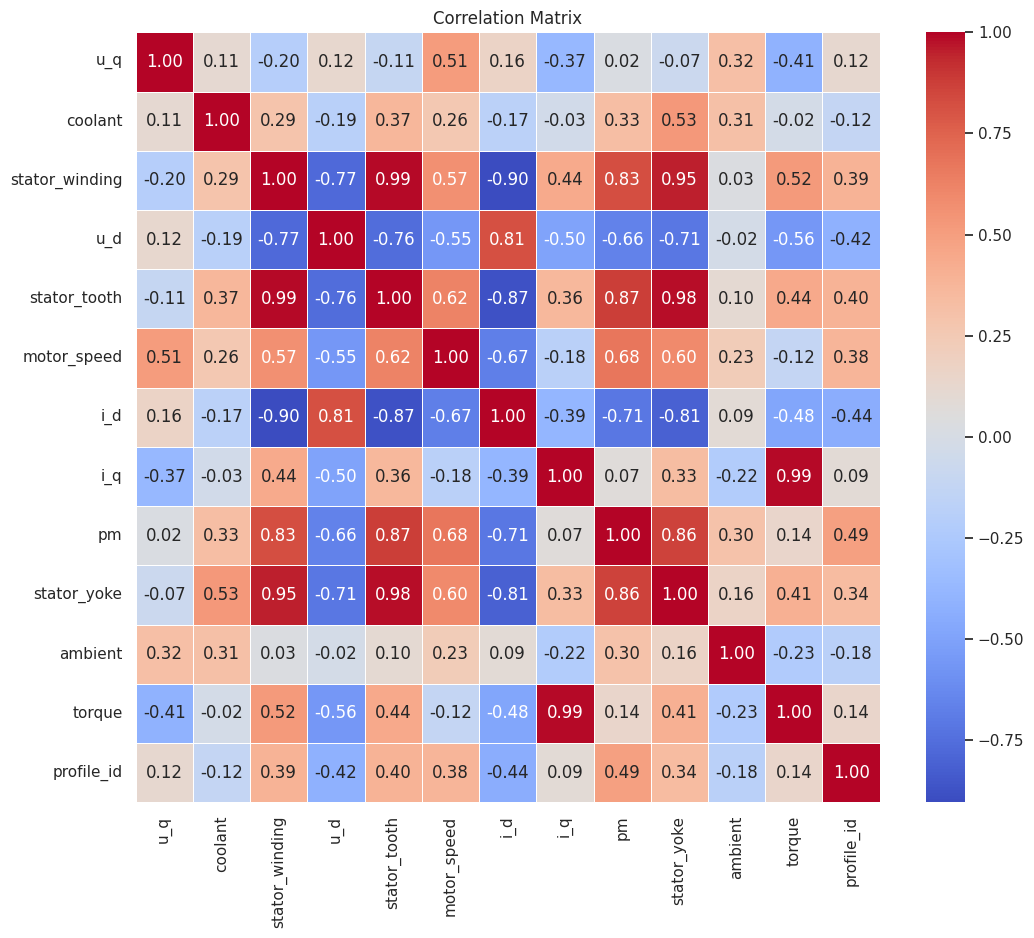

In [20]:
correlation_matrix = df1.corr()
correlations_with_target = correlation_matrix['stator_winding'].sort_values(ascending=False)

print("Correlations with", 'stator_winding', ":\n", correlations_with_target)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



In [22]:
from sklearn.model_selection import train_test_split
y=df1['stator_winding']
x=df1.drop('stator_winding', axis=1)
x_train , x_test , y_train, y_test =train_test_split(x,y,test_size=0.2)


In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
lr.score(x_test,y_test)

0.9987296460446189

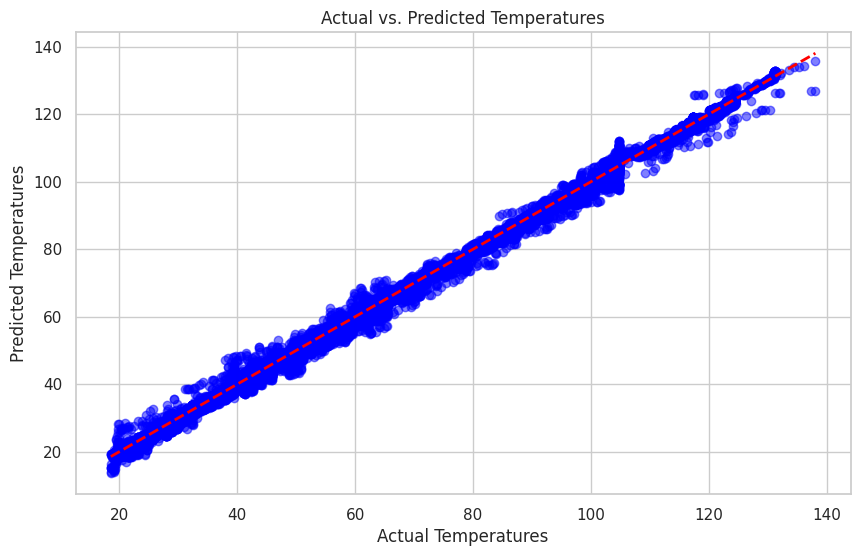

In [28]:
predicted_temperatures = lr.predict(x_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_temperatures, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Temperatures')
plt.ylabel('Predicted Temperatures')
plt.title('Actual vs. Predicted Temperatures')
plt.show()